# Overview Materi

Jelaskan secara singkat perbedaan antara bagging dan boosting menurut pemahamanmu!

# Import Data & Libraries

In [1]:
# import semua libraries yang akan dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [5]:
# import library
from sklearn import datasets
from sklearn.model_selection import train_test_split

# import data dari datasets.load_breast_cancer
data = datasets.load_breast_cancer()

# subsetting data
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

# split data dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)


Train shape: (455, 30) Test shape: (114, 30)


In [6]:
# ubah data ke dalam bentuk dataframe agar bisa ditampilkan dalam .head()
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Bagging from Scratch

## Random Forest Classifier - Sklearn

In [7]:
clf = RandomForestClassifier(n_estimators=100, random_state=42) # gunakan RandomForestClassifier dari Sklearn
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# print score menggunakan metrik accuracy
print('RandomForest (sklearn) Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

RandomForest (sklearn) Accuracy: 0.956140350877193
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## Random Forest from Scratch
Source: https://www.youtube.com/watch?v=kFwe2ZZU7yw

In [8]:
class SimpleBaggingClassifier:
    """Very simple bagging: train n_estimators decision trees on bootstrap samples and vote."""
    def __init__(self, n_estimators=10, max_depth=None, random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.random_state = random_state
        self.estimators_ = []
        self.rng = np.random.RandomState(random_state)

    def fit(self, X, y):
        self.estimators_ = []
        n = X.shape[0]
        for i in range(self.n_estimators):
            idx = self.rng.randint(0, n, size=n)
            clf = DecisionTreeClassifier(max_depth=self.max_depth, random_state=self.rng.randint(0,100000))
            clf.fit(X[idx], y[idx])
            self.estimators_.append(clf)
        return self

    def predict(self, X):
        preds = np.array([est.predict(X) for est in self.estimators_])
        maj = np.apply_along_axis(lambda row: np.bincount(row, minlength=2).argmax(), axis=0, arr=preds)
        return maj

bag = SimpleBaggingClassifier(n_estimators=50, max_depth=None, random_state=42)
bag.fit(X_train, y_train)
y_pred_bag = bag.predict(X_test)
print('Simple Bagging Accuracy:', accuracy_score(y_test, y_pred_bag))

Simple Bagging Accuracy: 0.9385964912280702


## Predict Using Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def accuracy(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

# print score menggunakan metrik akurasi
acc = accuracy(y_test, predictions)
print(f"Accuracy Random Forest: {acc:.4f}")


Accuracy Random Forest: 0.9561


# Boosting From Scratch

## Gradient Boosting Classifier - Sklearn

In [ ]:
# define and train the model using GradientBoostingClassifier from Sklearn
...

preds = ...

# print score menggunakan metrik accuracy
...

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# define and train the model using GradientBoostingClassifier from Sklearn
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

# print score menggunakan metrik accuracy
print('GradientBoosting (sklearn) Accuracy:', accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

GradientBoosting (sklearn) Accuracy: 0.956140350877193
              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## Gradient Boosting from Scratch with Decision Tree
Source: https://www.youtube.com/watch?v=Pq2mmJxjs1o

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class gradientBoostingClassifier:
    def __init__(self, lr=0.1, n_estimators=25, base_learner=DecisionTreeRegressor):
        ...

    def fit(self, X, y, **params):
        self.base_models = []

        Fm = np.zeros_like(y, dtype=float)

        _, axs = plt.subplots(5, 5, figsize=(10, 10))
        axs = axs.flatten()

        for i in range(self.n_estimators):
            r_i = y - sigmoid(Fm)
            h_i = self.base_learner(**params)
            h_i.fit(X, r_i)
            self.base_models.append(h_i)

            # update the model
            ...

            # Plotting
            ...

        plt.tight_layout()
        plt.show()

    def predict(self, X):
        Fm = np.zeros(X.shape[0])
        for h_i in self.base_models:
            Fm += self.lr * h_i.predict(X)

        probs = sigmoid(Fm)

        return (probs >= 0.5).astype(int)


In [5]:
import numpy as np
from sklearn.metrics import accuracy_score

def stump_predict(X, feature_idx, threshold, polarity):
    if polarity == 1:
        return (X[:, feature_idx] > threshold).astype(int)
    else:
        return (X[:, feature_idx] <= threshold).astype(int)

class SimpleAdaBoost:
    def __init__(self, n_estimators=50):
        self.n_estimators = n_estimators
        self.stumps = []
        self.stump_weights = []

    def fit(self, X, y):
        X = np.asarray(X)
        y = np.asarray(y)
        n_samples, n_features = X.shape


        y_signed = np.where(y == 1, 1, -1)
        w = np.ones(n_samples) / n_samples

        for m in range(self.n_estimators):
            best_error = float('inf')
            best_stump = None


            for feature in range(n_features):
                col = X[:, feature]
                uniq = np.unique(col)
                if uniq.size == 1:
                    thresholds = uniq
                else:
                    thresholds = (uniq[:-1] + uniq[1:]) / 2.0

                for thr in thresholds:
                    for polarity in [1, -1]:
                        pred = stump_predict(X, feature, thr, polarity)
                        pred_signed = np.where(pred == 1, 1, -1)
                        err = np.sum(w * (pred_signed != y_signed))
                        if err < best_error:
                            best_error = err
                            best_stump = (feature, thr, polarity, pred_signed)


            if best_stump is None:
                break


            eps = 1e-10

            best_error = max(min(best_error, 1 - eps), eps)
            alpha = 0.5 * np.log((1 - best_error) / best_error)


            pred_signed = best_stump[3]
            w = w * np.exp(-alpha * y_signed * pred_signed)
            w = w / np.sum(w)
            self.stumps.append((best_stump[0], best_stump[1], best_stump[2]))
            self.stump_weights.append(alpha)

        return self

    def predict(self, X):
        X = np.asarray(X)
        n_samples = X.shape[0]
        agg = np.zeros(n_samples)
        for (feature, thr, polarity), alpha in zip(self.stumps, self.stump_weights):
            pred = stump_predict(X, feature, thr, polarity)
            pred_signed = np.where(pred == 1, 1, -1)
            agg += alpha * pred_signed
        return (agg > 0).astype(int)




In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report

X, y = make_classification(
    n_samples=500, n_features=5, n_informative=3,
    n_redundant=0, random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


adb = SimpleAdaBoost(n_estimators=30)
adb.fit(X_train, y_train)
y_pred_adb = adb.predict(X_test)
print('Simple AdaBoost-like Accuracy:', accuracy_score(y_test, y_pred_adb))


Simple AdaBoost-like Accuracy: 0.94


## Predict Using Gradient Boosting

In [8]:
from sklearn.ensemble import GradientBoostingClassifier

# define and train the model
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [9]:
from sklearn.metrics import accuracy_score, classification_report

# get predictions
preds = gb.predict(X_test)

# print score menggunakan metrik accuracy
print("Gradient Boosting Accuracy:", accuracy_score(y_test, preds))
print(classification_report(y_test, preds))

Gradient Boosting Accuracy: 0.94
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        72
           1       0.96      0.92      0.94        78

    accuracy                           0.94       150
   macro avg       0.94      0.94      0.94       150
weighted avg       0.94      0.94      0.94       150



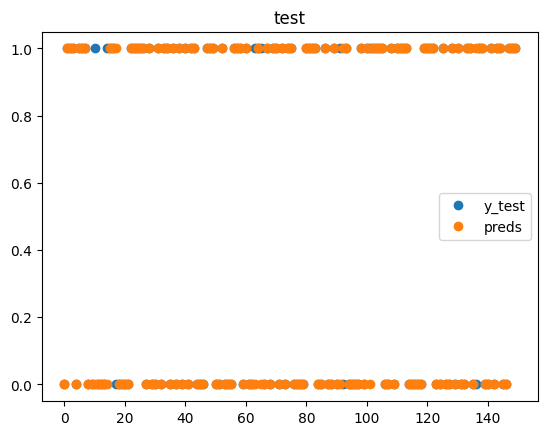

In [11]:
# plot predictions vs. the ground truth:
import matplotlib.pyplot as plt

_, ax = plt.subplots(1, 1)
plt.title('test')
ax.plot(y_test, 'o', label='y_test')
ax.plot(preds, 'o', label='preds')
ax.legend()
plt.show()
